## Assignment 9 (matplotlib assignment)
#### Submitted by Varun Garg

We have the min and max temperatures in a city In India for each months of the year.<br>
We would like to find a function to describe this and show it graphically, the dataset given below.<br>
Task:<br>
1.fitting it to the periodic function<br>
2.plot the fit<br>
Data<br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18<br>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline

In [180]:
maxtemp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
mintemp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and Max Temp')

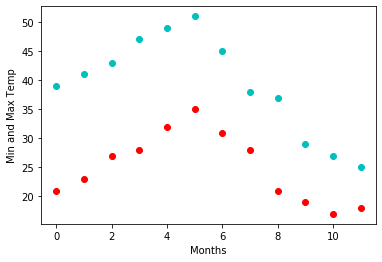

In [188]:
mth = np.arange(12)
plt.plot(mth,maxtemp,"co")
plt.plot(mth,mintemp,"ro")
plt.xlabel("Months")
plt.ylabel("Min and Max Temp")

In [200]:
def periodic(times, opt, opt1, opt2):
    return (opt+ opt1 * np.sin((times + opt2) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(periodic, mth,maxtemp, [40, 10, 0])
res_min, cov_min = optimize.curve_fit(periodic, mth,mintemp, [-40, 20, 0])
res_max

array([39.88861733, 10.59083168, -1.41629844])

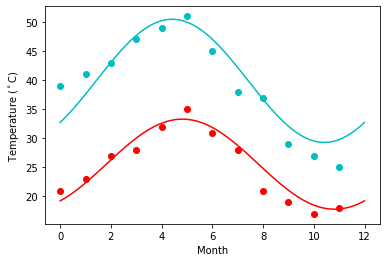

In [199]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(mth, maxtemp, 'co')
plt.plot(days, periodic(days, *res_max), 'c-')
plt.plot(mth, mintemp, 'ro')
plt.plot(days, periodic(days, *res_min), 'r-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#### Question 2:<br>
This assignment is for visualization using matplotlib:<br>
data to use:<br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv<br>
titanic = pd.read_csv(url)<br>
Charts to plot:<br>
1. Create a pie chart presenting the male/female proportion<br>
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender<br>

In [148]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [149]:
df = df.dropna(how = 'all')

#### Pie chart presenting the male/female proportion

##### Method 1

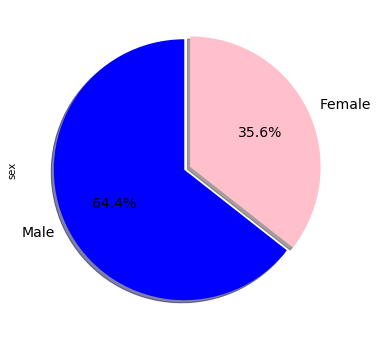

In [215]:
# lab = ["Male","Female"]
# col = ["Blue","Pink"]
# ex = (0,0.05)
# df.sex.value_counts().plot(kind="pie",labels = lab, figsize=(6,6), explode = ex, colors=col, autopct='%1.1f%%',textprops={'fontsize': 14}, startangle=90,shadow=True)

##### Method 2

In [150]:
newdf = df
newdf['cont'] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
pv = newdf.pivot_table(index =["sex"], aggfunc="count")
ratio = [round((pv.loc["female",'cont']/pv.cont.sum())*100,2),round((pv.loc["male",'cont']/pv.cont.sum())*100,2)]
ratio

[35.6, 64.4]

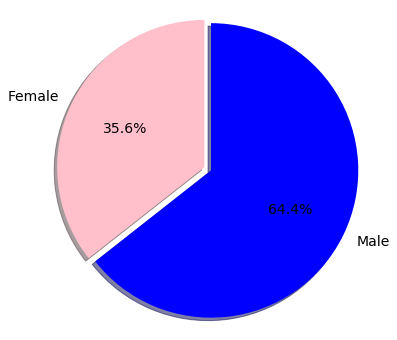

In [154]:
lab = ["Female","Male"]
col = ["Pink","Blue"]
ex = (0,0.05)
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(ratio, explode=ex, colors = col, labels=lab, autopct='%1.1f%%',textprops={'fontsize': 14}, startangle=90,shadow=True)
ax.axis('equal')
plt.show()

##### Scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Fare paid and Age by Gender')

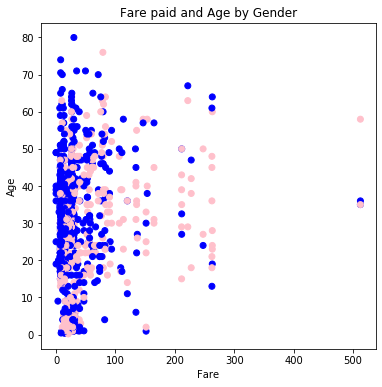

In [219]:
colors = {'male': "blue", 'female': "pink"}
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.scatter(df.fare,df.age,c=df['sex'].apply(lambda x: colors[x]))
ax1.set_xlabel("Fare")
ax1.set_ylabel("Age")
ax1.set_title("Fare paid and Age by Gender")